In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv('FY_2025_Hospital_Readmissions_Reduction_Program_Hospital.csv')
print(data.columns)
print(data.head())

Index(['Facility Name', 'Facility ID', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')
                     Facility Name  Facility ID State            Measure Name  \
0  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL       READM-30-AMI-HRRP   
1  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL      READM-30-CABG-HRRP   
2  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL        READM-30-HF-HRRP   
3  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL  READM-30-HIP-KNEE-HRRP   
4  SOUTHEAST HEALTH MEDICAL CENTER        10001    AL        READM-30-PN-HRRP   

   Number of Discharges  Footnote  Excess Readmission Ratio  \
0                 296.0       NaN                    0.9483   
1                 151.0       NaN                    0.9509   
2                 681.0       NaN        

                      Facility Name  Facility ID State        Measure Name  \
0   SOUTHEAST HEALTH MEDICAL CENTER        10001    AL   READM-30-AMI-HRRP   
1   SOUTHEAST HEALTH MEDICAL CENTER        10001    AL  READM-30-CABG-HRRP   
2   SOUTHEAST HEALTH MEDICAL CENTER        10001    AL    READM-30-HF-HRRP   
4   SOUTHEAST HEALTH MEDICAL CENTER        10001    AL    READM-30-PN-HRRP   
5   SOUTHEAST HEALTH MEDICAL CENTER        10001    AL  READM-30-COPD-HRRP   
8          MARSHALL MEDICAL CENTERS        10005    AL    READM-30-HF-HRRP   
9          MARSHALL MEDICAL CENTERS        10005    AL    READM-30-PN-HRRP   
11         MARSHALL MEDICAL CENTERS        10005    AL  READM-30-COPD-HRRP   

    Number of Discharges  Excess Readmission Ratio  \
0                  296.0                    0.9483   
1                  151.0                    0.9509   
2                  681.0                    1.0597   
4                  490.0                    0.9715   
5                  130.0   

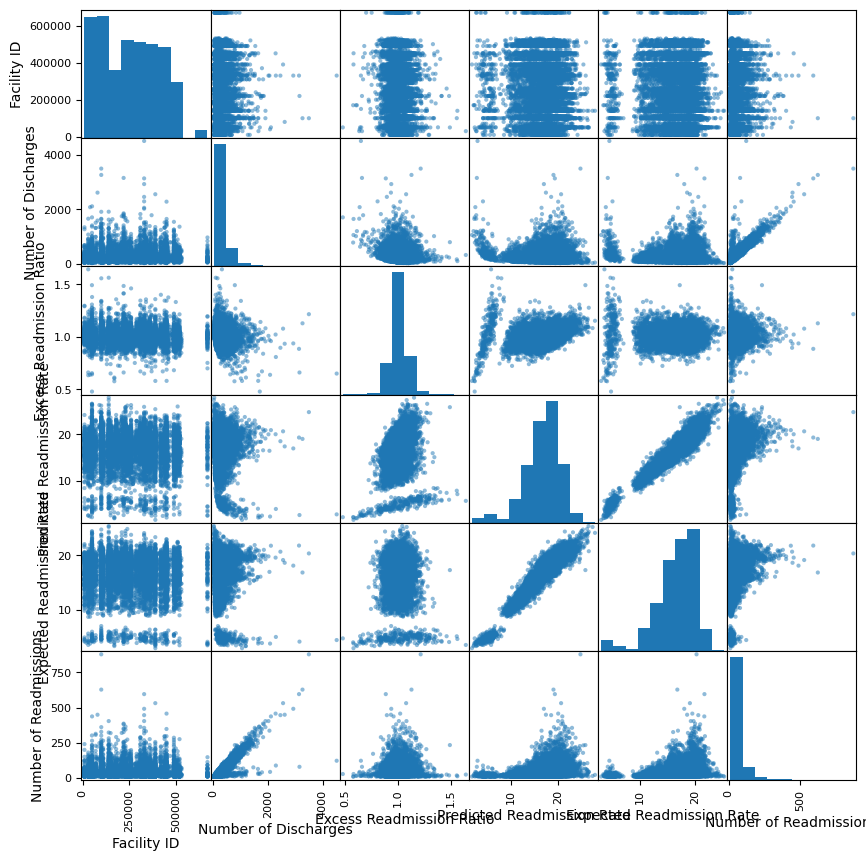

In [30]:
no_foot = data.drop(columns = ['Footnote'])
#looks like some rows like Number of Discharges are not plotting because they have NaN values for "too few to report" values
no_foot = no_foot.dropna()
no_foot['Number of Readmissions'] = no_foot['Number of Readmissions'].astype(float)
print(no_foot.head(8))
pd.plotting.scatter_matrix(no_foot.iloc[:,:], figsize = (10,10))
plt.show()
#I had to mess around with this a bunch to read those titles and then realized I could do it from the line above with data.head()

It looks like there is a very linear relationship between the predicted and expected readmission rate.
In Expected and Predicted Readmission rates there appear to be two distinct groups.

Of course we would expect no correlation between the ID number and anything else.

After playing with the data more there is also a very odd linear relationship between the Number of Discharges and Readmissions, it seems there are two 'linear paths'

Variables, meanings, and datatypes:
Facility Name - This is the facility where the data point took place - String

Facility ID - This relates each individual facility to an ID number - Integer

State - The state that the facility resides in - String

Measure Name - The type of measurement that occurs (medical procedure) - String

Number of Discharges - The total number of patients discharged for the measurement type - Integer

Footnote - Additional note about the data point (only about 1/3 have a footnote) - Integer

Excess Readmission Ratio - Measurement of ratio of the predicted readmission rate to the expected readmission rate - Float

Predicted Readmission Rate - Predicted 30 day readmission rate for a hospital based on its previous performances for specific cases - Float

Expected Readmission Rate - Expected 30 day readmission rate for a hospital baseed on readmission rates of similar hospitals with similar cases - Float

Number of Readmissions - The number of readmissions during the study period - Float

Start Date - The start date of the study - String

End Date - The end date of the study - String

[https://qualitynet.cms.gov/inpatient/hrrp/measures]

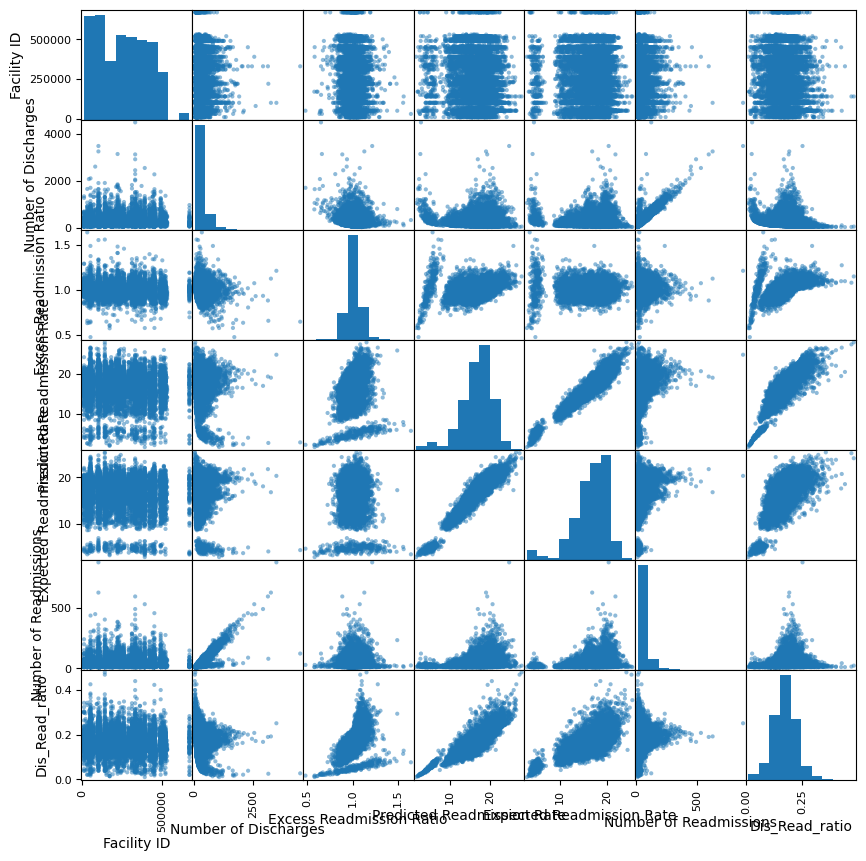

In [31]:

no_foot['Dis_Read_ratio'] = no_foot['Number of Readmissions']/no_foot['Number of Discharges']
pd.plotting.scatter_matrix(no_foot.iloc[:,:], figsize = (10,10))
plt.show()

In [32]:
print(data['Measure Name'].unique())
#There are 6 different types of measurements maybe I could evaluate the effectiveness of prediction on each of these measurement types

['READM-30-AMI-HRRP' 'READM-30-CABG-HRRP' 'READM-30-HF-HRRP'
 'READM-30-HIP-KNEE-HRRP' 'READM-30-PN-HRRP' 'READM-30-COPD-HRRP']


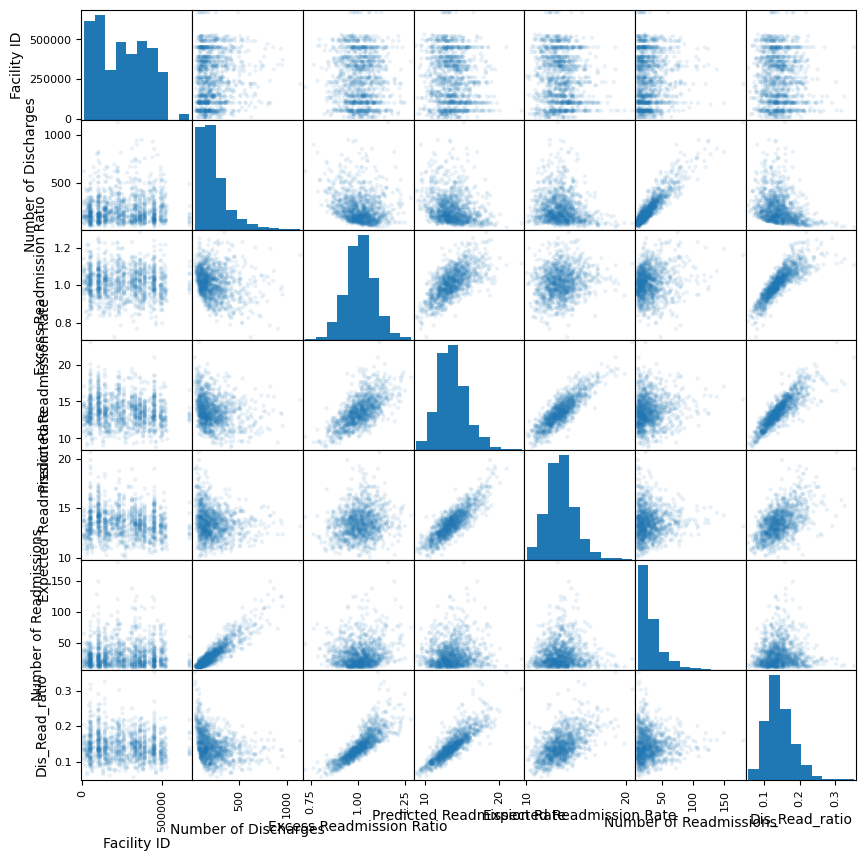

In [33]:
heart_attack_data = no_foot[no_foot['Measure Name'] == 'READM-30-AMI-HRRP']
pd.plotting.scatter_matrix(heart_attack_data.iloc[:,:], figsize = (10,10), alpha=0.1)
plt.show()

excess readmission ratio - predicted/expected
predicted - based on this hospital
expected based on other similar hospitals

Research Question:
How is the Excess Readmission Ratio of heart attack patients (>1 means the hospital is worse thanm average {more are predicted to readmit than at other hospitals}) influenced by the Number of Discharges?
What we want to know is, if hospitals discharge many patients do they have a high excess readmission rate (worse than average)?
We can do this with a linear regression. If there are many patients being discharged than we might expect that this is a good hospital because they are receiving many patients. 

Hypothesis:
    If a hospital has a high number of discharges for heart attack patients there will be a lower excess readmission ratio. (This also seems to be what the plot implies)


Why is this an interesting question for the board:
For hospitals that see a lot of patients for heart attacks, especially if they are successful in preventing readmission (repeated health issues), we would want to perform a study on why they are successful. By evaluating if it is true that hospitals that see more heart attack patients are better at treating them, then it would make sense to then look into what these hospitals are doing that is more effective than hospitals with a high excess readmission rate. This follow up allows the health industry to better analyze how treatment of these patients is effective. However, in order to perform the follow up we first need to have evidence that it is true.